In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv',header=None, usecols=[0,1,3,4,5,6,10,22], na_values='?')

#header=None означает, что нет заголовка у ДФ. usecols[] - указание на колонки, которые нужно загрузить, прямо по номеру, na_values='?' = замена ? на NaN

In [ ]:

df_mod = df.rename(columns={0: 'surgery?',1:'age',3:'rectal temp',4:'pulse',5:'respiratory rate',6:'temp of extremities',10:'pain',22:'outcome'})
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery?             299 non-null    float64
 1   age                  300 non-null    int64  
 2   rectal temp          240 non-null    float64
 3   pulse                276 non-null    float64
 4   respiratory rate     242 non-null    float64
 5   temp of extremities  244 non-null    float64
 6   pain                 245 non-null    float64
 7   outcome              299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
df_mod.describe()
#surgery?,age,outcome,pain - качественные номинальные данные, temp of extremities	 - качественные порядковые,
#rectel temp выглядит очень правдоподобно, будем считать, что это реальные хорощие данные
#pulse очевидно имеет явные отклонения, но не запредельно.  в терминальных состояния можеь быть и 184 наверное
#respiratory rate - значения выше, чем ожидалось. Нужно будет присмотреться, но возможно данные окажутся неприменимы.

,surgery?,age,rectal temp,pulse,respiratory rate,temp of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [ ]:
#Проверим, есть ли в столбце 'surgery' значения, отличные от 1 и 2
print(df_mod['surgery?'].unique())
# неправильных значений нет, есть пропуски, 

[ 2.  1. nan]


In [ ]:
#сделаем тоже самое в age
print(df_mod['age'].unique())
#ужидал 1 и 2, а тут какие-то 1 и 9

[1 9]


In [ ]:
df_mod.groupby('age').count()#будем считать, что это опечатка. 9 = молодая лошадь

,surgery?,rectal temp,pulse,respiratory rate,temp of extremities,pain,outcome
age,,,,,,,
1,275,220,254,222,228,228,275
9,24,20,22,20,16,17,24


In [ ]:
df_mod.pivot_table(index = 'surgery?', columns = 'outcome',values = 'age', aggfunc = 'count', fill_value=0, margins=True)
#небольшая сводная таблица. Видим, что 180 лошадей прооперировали, выжило 95, умерло 58 и 27 пришлось усыпить. 119 не оперировали, выжили 83, 
#умерли 19 и 17 усыпили. Такие пропорции наверное потому, что изначально оперировали более больных лошадей
#в качестве аргумента для count передал age просто потому, что пропусков нет

outcome,1.0,2.0,3.0,All
surgery?,,,,
1.0,95,58,27,180
2.0,83,19,17,119
All,178,77,44,299


In [ ]:
#поисследуем pulse
df_mod[('pulse')][~df_mod['pulse'].between(25,60)].mean()
#высокий пульс конечно лучше, чем никакого пульса совсем, но за пределами диапазона, который я лично сам назначил нормальным для лошадей(?) значения довольно высоки

93.62676056338029

In [ ]:
df_mod[('pulse')][~df_mod['pulse'].between(25,60)].median()

88.0

In [ ]:
df_mod.groupby(['pain','age'])['pulse'].mean()
#похоже, что у молодых лошадей пульс гораздо бодрее, буквально в разы. Интересный феномен. 

pain  age
1.0   1       48.916667
      9       92.000000
2.0   1       76.288462
      9      128.400000
3.0   1       59.133333
      9      120.800000
4.0   1       77.531250
      9      137.333333
5.0   1       83.531250
      9      125.333333
Name: pulse, dtype: float64

In [ ]:
#проверим корреляцию температур
df_mod.groupby(['temp of extremities','age'])['rectal temp'].count()
#мы помним, что норма это 37,8, а ср.значение мы считали 38,16. Явно с этими лошадьми что-то не так.

temp of extremities  age
1.0                  1      65
                     9       7
2.0                  1      26
                     9       0
3.0                  1      74
                     9       6
4.0                  1      19
                     9       1
Name: rectal temp, dtype: int64

In [ ]:
#2 Перейдем к пропускам.
(df_mod.isna().mean()*100).round(2)
#surgery/outcome по одному значению не хватает, ну и это такие фактические данные, котовые мы точно не сможем установить по косвенным признакам. 


surgery?                0.33
age                     0.00
rectal temp            20.00
pulse                   8.00
respiratory rate       19.33
temp of extremities    18.67
pain                   18.33
outcome                 0.33
dtype: float64

In [ ]:
df_mod[df_mod['surgery?'].isnull()]#видно,что да, есть строка, где отсутствуют оба этих значения. Заменю на 0, чтобы случайно тип данных не потерять

,surgery?,age,rectal temp,pulse,respiratory rate,temp of extremities,pain,outcome
132,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


In [ ]:
df_mod['surgery?'] = df_mod['surgery?'].fillna(0)

In [ ]:
df_mod['outcome'] = df_mod['outcome'].fillna(0)

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery?             300 non-null    float64
 1   age                  300 non-null    int64  
 2   rectal temp          240 non-null    float64
 3   pulse                276 non-null    float64
 4   respiratory rate     242 non-null    float64
 5   temp of extremities  244 non-null    float64
 6   pain                 245 non-null    float64
 7   outcome              300 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
df_mod.dropna(how='all')#попробовал удалить строкт, где все значения NaN - ничего не удалилось

,surgery?,age,rectal temp,pulse,respiratory rate,temp of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
#думаю, что столбец rectal temp можно более менее адекватно заполнить стредними значениями с группировкой по temp of extremities и age
df_fill_temp = df_mod.copy()
df_fill_temp['rectal temp'] = df_fill_temp['rectal temp'].fillna(df_mod.groupby(['age','temp of extremities'])['rectal temp'].transform('mean'))

In [ ]:
print(df_mod['rectal temp'].mean())
print(df_mod['rectal temp'].median())
print('-----------------------')
print(df_fill_temp['rectal temp'].mean())
print(df_fill_temp['rectal temp'].median())



38.16791666666667
38.2
-----------------------
38.17303272332635
38.152702702702705


In [ ]:
df_fill_temp.info()
#видно, что в строке rectal temp остались незаполненные значения. Было 60 пропусков, стало 15

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery?             300 non-null    float64
 1   age                  300 non-null    int64  
 2   rectal temp          285 non-null    float64
 3   pulse                276 non-null    float64
 4   respiratory rate     242 non-null    float64
 5   temp of extremities  244 non-null    float64
 6   pain                 245 non-null    float64
 7   outcome              300 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
#видно, что в строке rectal temp остались незаполненные значения. 
df_fill_temp[df_fill_temp['rectal temp'].isnull()]
#вывел строки, в которых rectal temp не заполнился в результате предыдущих манипуляций, и видно, что в этих строках вообще очень много пропусков

,surgery?,age,rectal temp,pulse,respiratory rate,temp of extremities,pain,outcome
28,1.0,1,NaN,NaN,NaN,NaN,NaN,2.0
56,1.0,1,NaN,NaN,NaN,NaN,NaN,1.0
74,1.0,9,NaN,NaN,NaN,NaN,NaN,2.0
87,2.0,1,NaN,40.0,16.0,NaN,NaN,3.0
96,2.0,1,NaN,84.0,36.0,NaN,NaN,1.0
160,1.0,1,NaN,NaN,NaN,NaN,4.0,1.0
169,1.0,1,NaN,65.0,24.0,NaN,5.0,3.0
175,1.0,1,NaN,NaN,NaN,NaN,NaN,1.0
177,1.0,1,NaN,68.0,14.0,NaN,4.0,2.0
191,2.0,9,NaN,100.0,44.0,2.0,4.0,1.0


In [ ]:
#удаляю строки, где из 8 заполнено 4 значения и меньше
df_drop_4 = df_fill_temp.dropna(thresh = 5)

In [ ]:
df_drop_4.info()#неидеально.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery?             290 non-null    float64
 1   age                  290 non-null    int64  
 2   rectal temp          285 non-null    float64
 3   pulse                275 non-null    float64
 4   respiratory rate     242 non-null    float64
 5   temp of extremities  244 non-null    float64
 6   pain                 244 non-null    float64
 7   outcome              290 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 20.4 KB


In [ ]:
#pulse думаю заполнить средними значениями с группировкой по pain и age
df_fill_pulse = df_drop_4.copy()
df_fill_pulse['pulse'] = df_fill_pulse['pulse'].fillna(df_drop_4.groupby(['pain','age'])['pulse'].transform('mean'))

In [ ]:
(df_fill_pulse.isna().mean()*100).round(2)

surgery?                0.00
age                     0.00
rectal temp             1.72
pulse                   0.00
respiratory rate       16.55
temp of extremities    15.86
pain                   15.86
outcome                 0.00
dtype: float64

In [ ]:
df_drop_4[df_drop_4['rectal temp'].isnull()]#остается 5 пропусков. Температуру все-таки предлагается допинать. Думаю, факторы pain, outcome и age использовать, группировать по ним и взять среднее.

,surgery?,age,rectal temp,pulse,respiratory rate,temp of extremities,pain,outcome
87,2.0,1,NaN,40.0,16.0,NaN,NaN,3.0
96,2.0,1,NaN,84.0,36.0,NaN,NaN,1.0
169,1.0,1,NaN,65.0,24.0,NaN,5.0,3.0
177,1.0,1,NaN,68.0,14.0,NaN,4.0,2.0
191,2.0,9,NaN,100.0,44.0,2.0,4.0,1.0


In [ ]:
df_fill_temp_2 = df_drop_4.copy()
df_fill_temp_2['rectal temp'] = df_fill_temp_2['rectal temp'].fillna(df_drop_4.groupby(['age','pain','outcome'])['rectal temp'].transform('mean'))

In [ ]:
df_fill_temp_2[df_fill_temp_2['rectal temp'].isnull()]

,surgery?,age,rectal temp,pulse,respiratory rate,temp of extremities,pain,outcome
87,2.0,1,NaN,40.0,16.0,NaN,NaN,3.0
96,2.0,1,NaN,84.0,36.0,NaN,NaN,1.0
191,2.0,9,NaN,100.0,44.0,2.0,4.0,1.0


In [ ]:
#не вижу иного выхода, кроме удалить оставшиеся три пропуска 
df_fill_temp_2.dropna(axis = 'index', subset = ['rectal temp'], inplace = True)

In [ ]:
df_fill_temp_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery?             287 non-null    float64
 1   age                  287 non-null    int64  
 2   rectal temp          287 non-null    float64
 3   pulse                272 non-null    float64
 4   respiratory rate     239 non-null    float64
 5   temp of extremities  243 non-null    float64
 6   pain                 243 non-null    float64
 7   outcome              287 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 20.2 KB


In [ ]:
import missingno as msno#тяжелая артиллерия пошла

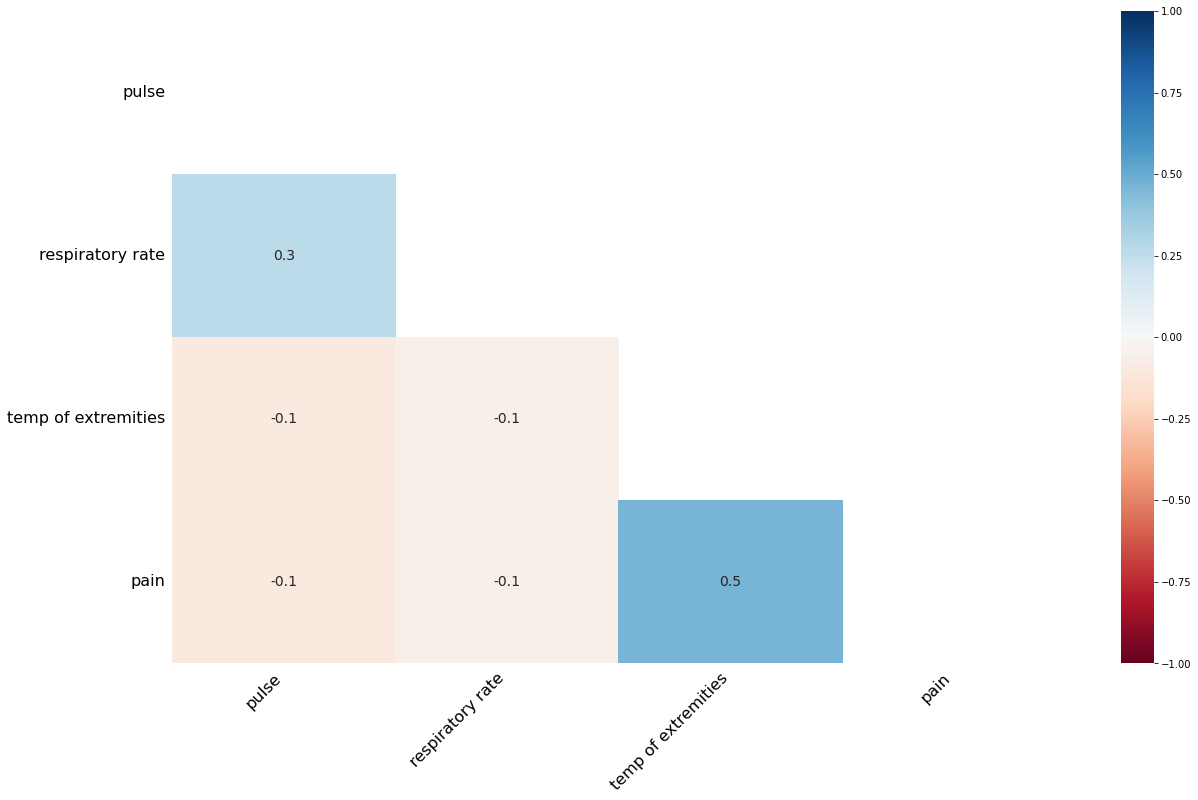

In [ ]:
msno.heatmap(df_fill_temp_2)#heatmap считает и визуализирует корреляцию в данных, где есть пропущенные значения

In [ ]:
#видно, что respiratory rate вообще ни с кем никак. Сами специаличты говорят, что "usefulness is doubtful due to the great fluctuations"
#поэтому кажется можно спокойно игнорировать эти данные и удалить их совсем
df_fill_temp_2.drop(['respiratory rate'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery?             287 non-null    float64
 1   age                  287 non-null    int64  
 2   rectal temp          287 non-null    float64
 3   pulse                272 non-null    float64
 4   temp of extremities  243 non-null    float64
 5   pain                 243 non-null    float64
 6   outcome              287 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 17.9 KB


In [ ]:
#также видно, что между pain и temp of extremities есть какая-то полусвязь. Но вообщ говоря, pain это сугубо субъективная оценка.
#Наличие боли влияет на принятие решение боли об операции, но на основании информации об операции наверно не совсем корректно  
#пытаться заполнить пропуски. А на наличие боли влияет то, какое лечение получал конь, чего мы знать не можем. 
#поэтому кажется разумно ввести новую категорию 0, это будет боль, про которую не известно.

In [ ]:
df_fill_temp_2['pain'] = df_fill_temp_2['pain'].fillna(0)

In [ ]:
df_fill_temp_2.groupby(['pain','surgery?'])['age'].count()
#видно, что распределение в этой группе отличается от остальных. Более глубокий анализ не проводил.

pain  surgery?
0.0   1.0         29
      2.0         15
1.0   1.0          9
      2.0         29
2.0   1.0         34
      2.0         25
3.0   1.0         39
      2.0         28
4.0   0.0          1
      1.0         27
      2.0          9
5.0   1.0         33
      2.0          9
Name: age, dtype: int64

In [ ]:
#pulse дозаполню средним пульсом с группировкой по возрастам.
df_fill_pulse = df_fill_temp_2.copy()
df_fill_pulse['pulse'] = df_fill_pulse['pulse'].fillna(df_fill_temp_2.groupby(['age'])['pulse'].transform('mean'))

In [ ]:
df_fill_pulse.info()#колонка respiratory rate появилась опять, я же ее дропнул.Не понятно.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery?             287 non-null    float64
 1   age                  287 non-null    int64  
 2   rectal temp          287 non-null    float64
 3   pulse                287 non-null    float64
 4   respiratory rate     239 non-null    float64
 5   temp of extremities  243 non-null    float64
 6   pain                 287 non-null    float64
 7   outcome              287 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 20.2 KB


In [ ]:
#OK, удалю потом опять. temp of extremities остается основная проблема. Пропусков много. 44 значения, это примерно 18% от ДФ, удалить не вариант
#переменная категориальная, т.е. можно ввести новую категорию 0, но сами разработчики ДФ пишут, что hot extremities should correlate with an elevated rectal temp
#т.е. наверное не будет большой ошибкой взять медианные значения группы temp of extremities №4 с группировкой по возрастам, 
#и тем лошадям, у кого rectal temp > медианных значений, заполнить пропуск = 4, всем остальным медианное значение по всей выборке сделать.

df_fill_pulse['rectal temp'] = df_fill_pulse['rectal temp'].round(2)

In [ ]:
df_fill_pulse.groupby(['temp of extremities','age'])['rectal temp'].median()


temp of extremities  age
1.0                  1      38.09
                     9      38.30
2.0                  1      38.20
3.0                  1      38.15
                     9      38.60
4.0                  1      38.42
                     9      39.10
Name: rectal temp, dtype: float64

In [ ]:
#применяю медот loc к ДФ, прошу его по условию, что rectal temp больше значения, которое мы вычислили и лошадь взрослая, либо,что если лошадь молода,
#то другое значение, заполнить пропуски (fillna(4) значением "4". 
#код падает с ошибкой. что-то с синтаксисом, нужна подсказка, иначе уперся просто в стену. Спасибо.
df_fill_pulse.loc[df_fill_pulse['rectal temp'] > 38.42 and df_fill_pulse.age = 1|df_fill_pulse['rectal temp'] > 39.10 and df_fill_pulse.age = 9,'temp of extremities'].fillna(4)

SyntaxError: ignored

In [ ]:
df_fill_extrem = df_fill_pulse.copy()
df_fill_extrem['temp of extremities'] = df_fill_extrem['temp of extremities'].fillna(df_fill_pulse.groupby(['age'])['temp of extremities'].transform('mean'))

In [ ]:
#повторно дропнул respiratory rate
#в итоге 4% строк потерялось и 1 колонка. Довольно запутанная логика и реализация. Я сам честно запутался. Loc в конце меня прсто доконал. 
df_fill_extrem.drop(['respiratory rate'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery?             287 non-null    float64
 1   age                  287 non-null    int64  
 2   rectal temp          287 non-null    float64
 3   pulse                287 non-null    float64
 4   temp of extremities  287 non-null    float64
 5   pain                 287 non-null    float64
 6   outcome              287 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 17.9 KB
